In [50]:
#load groundtruth excel
import pandas as pd
import os
ground_directory = os.path.abspath("../dataset/groundtruth/")
ground_path=os.path.join(ground_directory, "phq9.csv")
groundtruth=pd.read_csv(ground_path)
groundtruth.info()
display(groundtruth)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pid                 44 non-null     object 
 1   start_ts            44 non-null     object 
 2   end_ts              44 non-null     object 
 3   start_phq9          44 non-null     int64  
 4   end_phq9            40 non-null     float64
 5   depression_episode  44 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.2+ KB


,pid,start_ts,end_ts,start_phq9,end_phq9,depression_episode
0,P08,7/21/22,8/9/22,6,1.0,0
1,P08,8/9/22,8/23/22,1,9.0,0
2,P10,7/21/22,8/9/22,8,7.0,1
3,P10,8/9/22,9/2/22,7,2.0,0
4,P12,7/22/22,8/9/22,10,12.0,1
5,P12,8/9/22,8/23/22,12,9.0,1
6,P13,7/25/22,8/9/22,1,3.0,0
7,P13,8/9/22,8/23/22,3,2.0,0
8,P14,7/25/22,8/8/22 0:00,11,NaN,0
9,P15,7/26/22,8/10/22,4,9.0,0


In [ ]:
#load json dataset
import json
json_directory = os.path.abspath("../dataset/data/")
# List all JSON files in the directory
json_files = [f for f in os.listdir(json_directory) if f.endswith('.json')]
# Create an empty list to store extracted data
data_list = []
# Loop through each JSON file
for json_file in json_files:
    file_path = os.path.join(json_directory, json_file)
    with open(file_path, "r") as f:
        data = json.load(f)
        if isinstance(data, list):
            data_list.extend(data)  # Ensure list of dictionaries
        else:
            data_list.append(data)  # If it's a single dictionary, append it
# Convert list of JSON objects into a structured DataFrame
df = pd.json_normalize(data_list, sep="_")
# Display the first few rows
pd.set_option("display.max_columns", None)

display(df)


,boundingBox,contours,fileName,gameId,landmarks,timestamp,pid,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,metadata_appVersion,metadata_gameId,metadata_seq_id,metadata_timestamp,metadata_triggerName,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24
0,-14 835 1089 1919,"[{'x': 512, 'y': 1012}, {'x': 579, 'y': 1012},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-26-...,9b08217e-0ca4-4f7e-92f8-e55a39fe1c05,"[{'type': 0, 'x': 550.54803, 'y': 1789.8816}, ...",1661540666824,P21,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,0.0.5,9b08217e-0ca4-4f7e-92f8-e55a39fe1c05,1661540590215,1661540666824,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200 871 931 1618,"[{'x': 535, 'y': 934}, {'x': 585, 'y': 933}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-23-...,b5a3ce65-f896-4929-bf4a-d06b6ad475c3,"[{'type': 0, 'x': 581.6955, 'y': 1494.7842}, {...",1661263366281,P21,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,0.0.5,b5a3ce65-f896-4929-bf4a-d06b6ad475c3,1661263279421,1661263366281,flowerGame,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570
2,178 936 860 1604,"[{'x': 556, 'y': 990}, {'x': 599, 'y': 998}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-09-...,52da674e-9f30-43db-8857-858a36ad33de,"[{'type': 0, 'x': 508.3537, 'y': 1482.4552}, {...",1660071665236,P21,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,0.0.5,52da674e-9f30-43db-8857-858a36ad33de,1660071641060,1660071665236,flowerGame,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689
3,28 1056 1312 2005,"[{'x': 638, 'y': 1258}, {'x': 726, 'y': 1256},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-06-...,ef5aeeda-32c4-46b9-bbca-b70209994c53,"[{'type': 0, 'x': 684.9218, 'y': 2143.3005}, {...",1659812536345,P21,0.211136,0.906545,0.652535,-7.051201,-9.188964,3.848174,0.0.5,ef5aeeda-32c4-46b9-bbca-b70209994c53,1659812485638,1659812536345,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-27 784 1163 1909,"[{'x': 523, 'y': 963}, {'x': 596, 'y': 961}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-16-...,ba5281b7-ab2a-4098-8a6f-c9977306eaa7,"[{'type': 0, 'x': 602.7415, 'y': 1799.8873}, {...",1660661352612,P21,0.990865,0.938204,0.008071,-4.390600,-0.422799,5.333356,0.0.5,ba5281b7-ab2a-4098-8a6f-c9977306eaa7,1660661263672,1660661352612,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399276,-11 1184 974 2170,"[{'x': 417, 'y': 1280}, {'x': 483, 'y': 1277},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-13-...,45a5a880-bf8e-4a09-8070-e2dc5e5a202a,"[{'type': 0, 'x': 464.82196, 'y': 1967.1857}, ...",1660403827367,P18,0.990354,0.996827,0.007616,7.273943,-8.872025,3.136459,0.0.5,45a5a880-bf8e-4a09-8070-e2dc5e5a202a,1660403737335,1660403827367,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399277,341 902 1174 1753,"[{'x': 737, 'y': 995}, {'x': 792, 'y': 996}, {...",/storage/emulated/0/DCIM/HiddenCam/2022-08-06-...,c7bca2d2-d747-47ae-8798-2118bac7f1b2,"[{'type': 0, 'x': 743.52686, 'y': 1539.5918}, ...",1659819796588,P18,0.029205,0.024098,0.031306,11.071193,-3.039715,0.638989,0.0.5,c7bca2d2-d747-47ae-8798-2118bac7f1b2,1659819764387,1659819796588,flowerGame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399278,284 1090 1118 1941,"[{'x': 683, 'y': 1172}, {'x': 735, 'y': 1174},...",/storage/emulated/0/DCIM/HiddenCam/2022-08-14-...,appUsage,"[{'type': 0, 'x': 711.18884, 'y': 1767.9626}, ...",1660509382034,P18,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,0.0.5,appUsage,1660509378843,1660509382034,com.android.chrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399279,292 1226 1143 2095,"[{'x': 699, 'y': 12

In [ ]:
# Select relevant features
columns_to_keep = [
    "pid", "boundingBox", "classification_leftEyeOpenProbability", 
    "classification_rightEyeOpenProbability", "classification_smilingProbability",
    "headEulerAngle_X", "headEulerAngle_Y", "headEulerAngle_Z", "au_AU01", "au_AU02",
    "au_AU04", "au_AU06", "au_AU07", "au_AU10", "au_AU12", "au_AU14", "au_AU15",
    "au_AU17", "au_AU23", "au_AU24"
]

# Ensure columns exist before extraction
df_extracted = df.reindex(columns=columns_to_keep, fill_value=None)

# Display the extracted structured DataFrame
display(df_extracted)


,pid,boundingBox,classification_leftEyeOpenProbability,classification_rightEyeOpenProbability,classification_smilingProbability,headEulerAngle_X,headEulerAngle_Y,headEulerAngle_Z,au_AU01,au_AU02,au_AU04,au_AU06,au_AU07,au_AU10,au_AU12,au_AU14,au_AU15,au_AU17,au_AU23,au_AU24
0,P21,-14 835 1089 1919,0.994761,0.992931,0.010426,-4.881513,0.175707,2.570232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P21,200 871 931 1618,0.990354,0.995583,0.006722,0.153201,-1.543784,4.104684,-0.446513,-1.305582,-2.812059,1.591995,7.492649,-3.761609,-3.231098,-2.135083,-3.799604,1.714989,-0.248590,-15.851570
2,P21,178 936 860 1604,0.988258,0.992232,0.003747,6.231903,0.866286,-5.533393,-0.386842,0.317061,-4.495584,-4.417252,4.156268,-4.602196,-6.266154,6.466660,7.472216,3.648103,0.824292,-12.788689
3,P21,28 1056 1312 2005,0.211136,0.906545,0.652535,-7.051201,-9.188964,3.848174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P21,-27 784 1163 1909,0.990865,0.938204,0.008071,-4.390600,-0.422799,5.333356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399276,P18,-11 1184 974 2170,0.990354,0.996827,0.007616,7.273943,-8.872025,3.136459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399277,P18,341 902 1174 1753,0.029205,0.024098,0.031306,11.071193,-3.039715,0.638989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399278,P18,284 1090 1118 1941,0.279111,0.029933,0.128848,17.421429,0.912104,1.022833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399279,P18,292 1226 1143 2095,0.031943,0.020863,0.539508,12.875384,1.750542,1.901327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#check missing values
print(df_extracted.info())
print(df_extracted.describe())
missing_values=df_extracted.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399281 entries, 0 to 399280
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   pid                                     399281 non-null  object 
 1   boundingBox                             399281 non-null  object 
 2   classification_leftEyeOpenProbability   390093 non-null  float64
 3   classification_rightEyeOpenProbability  390093 non-null  float64
 4   classification_smilingProbability       390093 non-null  float64
 5   headEulerAngle_X                        399281 non-null  float64
 6   headEulerAngle_Y                        399281 non-null  float64
 7   headEulerAngle_Z                        399281 non-null  float64
 8   au_AU01                                 201173 non-null  float64
 9   au_AU02                                 201173 non-null  float64
 10  au_AU04                                 2011

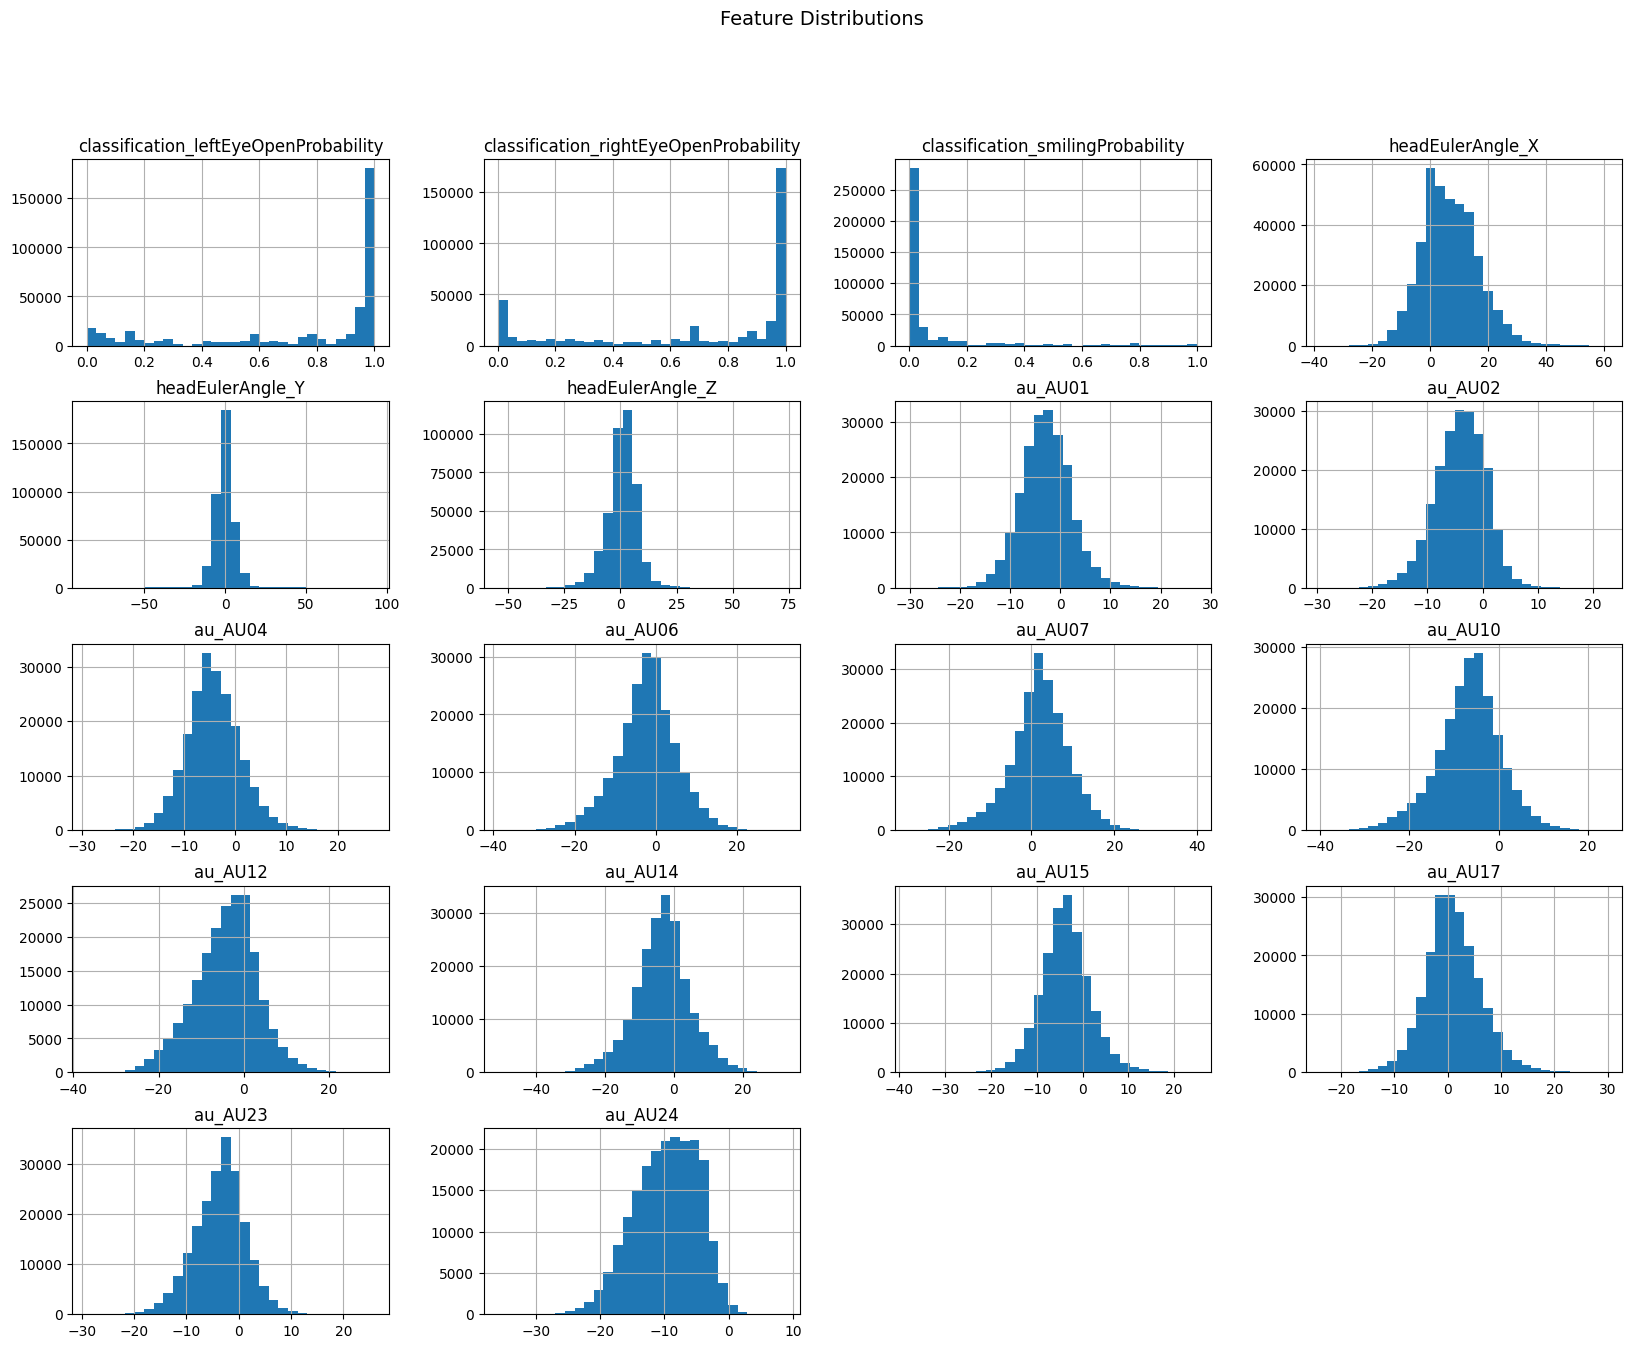

In [46]:
#feature distribution
#Histogram
import matplotlib.pyplot as plt
df_extracted.hist(figsize=(20, 15), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


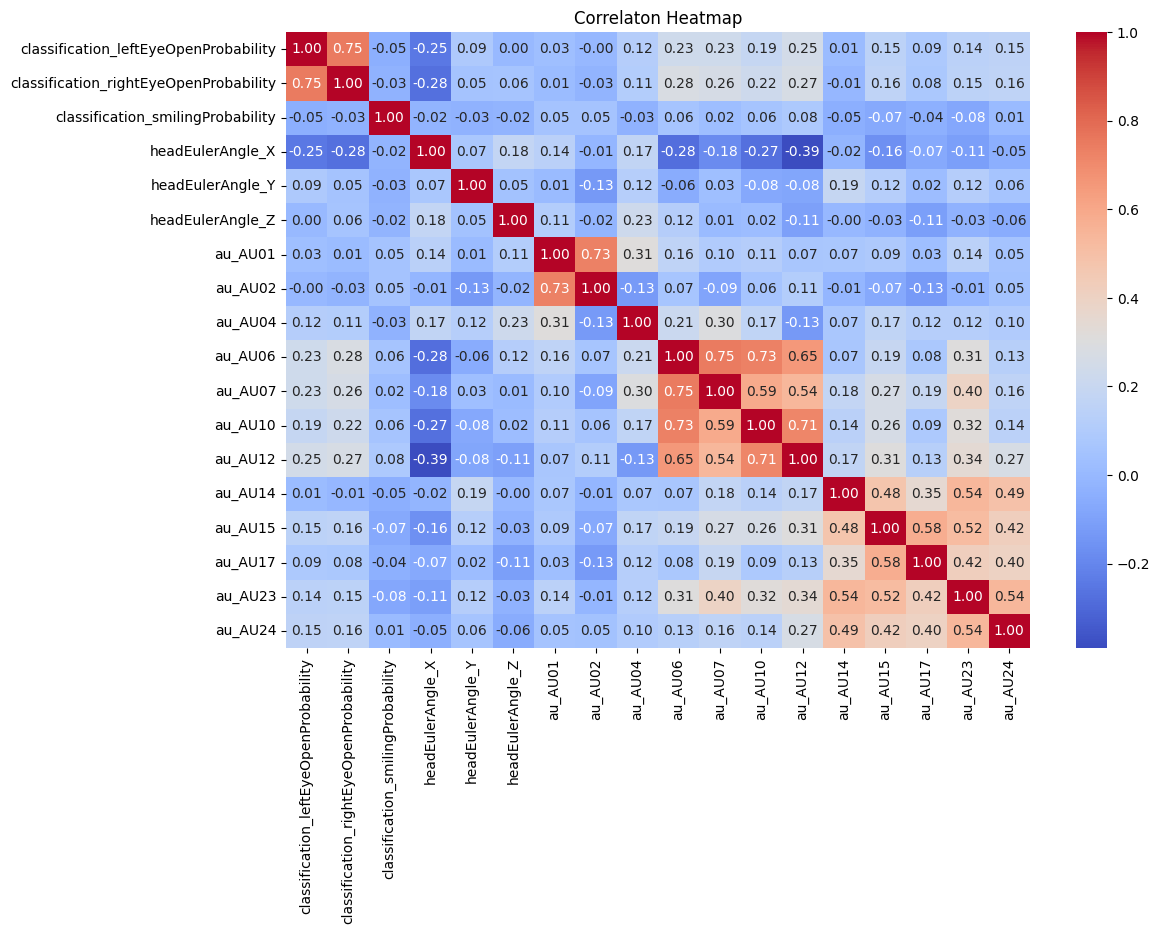

In [49]:
#Heatmap correlation analysis
import seaborn as sns
plt.figure(figsize=(12,8))
df_num=df_extracted.select_dtypes(include="number")
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlaton Heatmap")
plt.show()